In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import xticks
from matplotlib.pyplot import yticks
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix
import pickle
from sklearn.model_selection import RandomizedSearchCV

In [2]:
titanic_train = pd.DataFrame(pd.read_csv("train.csv"))
titanic_test = pd.DataFrame(pd.read_csv("test.csv"))

In [3]:
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
print(titanic_train.shape)
print(titanic_test.shape)

(891, 12)
(418, 11)


In [6]:
import pandas as pd

# Assuming your DataFrame is named 'df'
# Create separate DataFrames for each class
class_0 = titanic_train[titanic_train['Survived'] == 0]
class_1 = titanic_train[titanic_train['Survived'] == 1]

# Undersample the majority class to match the number of instances for the minority class
undersampled_class_0 = class_0.sample(n=len(class_1), random_state=42)

# Concatenate the undersampled majority class with the minority class
balanced_df = pd.concat([undersampled_class_0, class_1])

# Shuffle the rows to mix the classes
titanic_train = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)

titanic_train["Survived"].value_counts()

1    342
0    342
Name: Survived, dtype: int64

In [7]:
titanic_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [8]:
print(titanic_train.info())
print(titanic_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 684 entries, 0 to 683
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  684 non-null    int64  
 1   Survived     684 non-null    int64  
 2   Pclass       684 non-null    int64  
 3   Name         684 non-null    object 
 4   Sex          684 non-null    object 
 5   Age          555 non-null    float64
 6   SibSp        684 non-null    int64  
 7   Parch        684 non-null    int64  
 8   Ticket       684 non-null    object 
 9   Fare         684 non-null    float64
 10  Cabin        172 non-null    object 
 11  Embarked     682 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 64.3+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pcl

In [9]:
titanic_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,684.000000,684.000000,684.000000,555.000000,684.00000,684.000000,684.000000
mean,444.552632,0.500000,2.241228,29.923730,0.46345,0.391813,34.669140
std,256.916719,0.500366,0.853206,14.585599,0.89089,0.830419,53.064796
min,1.000000,0.000000,1.000000,0.420000,0.00000,0.000000,0.000000
25%,224.750000,0.000000,1.000000,21.000000,0.00000,0.000000,8.003150
50%,447.500000,0.500000,3.000000,29.000000,0.00000,0.000000,15.500000
75%,664.250000,1.000000,3.000000,39.000000,1.00000,0.000000,33.000000
max,891.000000,1.000000,3.000000,80.000000,8.00000,6.000000,512.329200


In [10]:
titanic_train[titanic_train.duplicated()].sum()

PassengerId    0.0
Survived       0.0
Pclass         0.0
Name           0.0
Sex            0.0
Age            0.0
SibSp          0.0
Parch          0.0
Ticket         0.0
Fare           0.0
Cabin          0.0
Embarked       0.0
dtype: float64

In [11]:
#Missing value in training set
pd.isnull(titanic_train).sum().sort_values(ascending = False)

Cabin          512
Age            129
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

<Axes: >

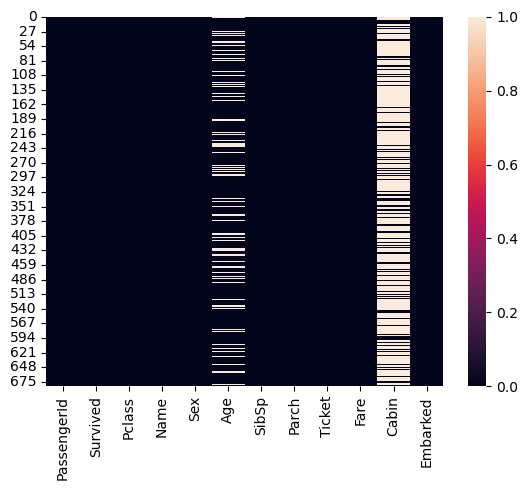

In [12]:
sns.heatmap(titanic_train.isnull())

In [13]:
#Missing value in training set
pd.isnull(titanic_test).sum().sort_values(ascending = False)

Cabin          327
Age             86
Fare             1
PassengerId      0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Embarked         0
dtype: int64

<Axes: >

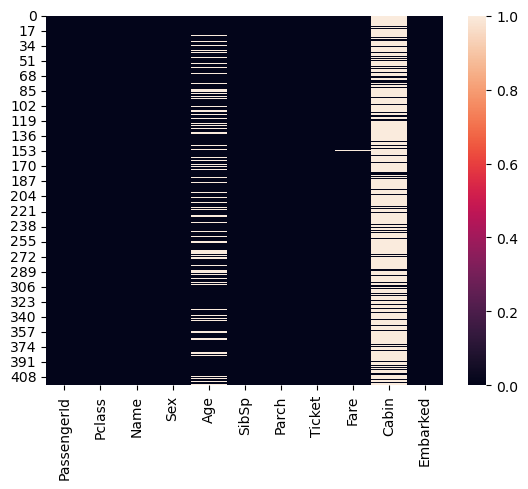

In [14]:
sns.heatmap(titanic_test.isnull())

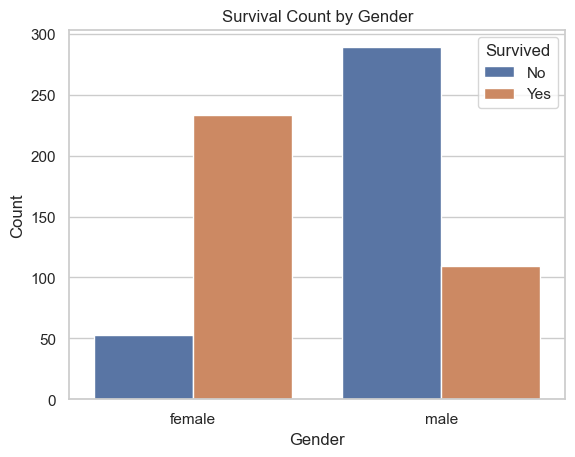

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'titanic' is your DataFrame
sns.set(style="whitegrid")  # Optional: Set the style of the plot

# Create the plot
ax = sns.countplot(x='Sex', hue='Survived', data=titanic_train)

# Customize the plot
ax.set_title('Survival Count by Gender')
ax.set_xlabel('Gender')
ax.set_ylabel('Count')
ax.legend(title='Survived', loc='upper right', labels=['No', 'Yes'])

# Show the plot
plt.show()


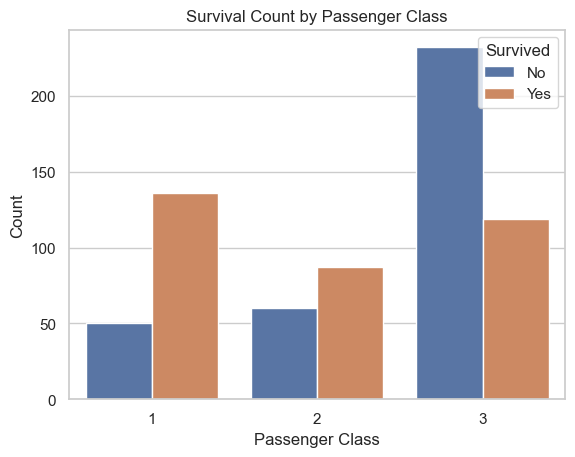

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

# Create the plot
ax = sns.countplot(x='Pclass', hue='Survived', data=titanic_train)

# Customize the plot
ax.set_title('Survival Count by Passenger Class')
ax.set_xlabel('Passenger Class')
ax.set_ylabel('Count')
ax.legend(title='Survived', loc='upper right', labels=['No', 'Yes'])

# Show the plot
plt.show()


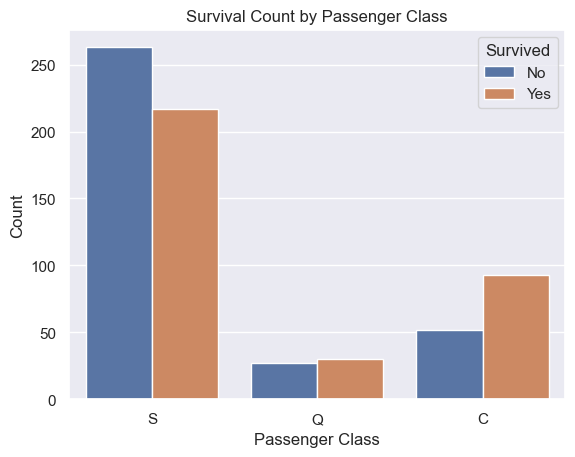

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="darkgrid")

# Create the plot
ax = sns.countplot(x='Embarked', hue='Survived', data=titanic_train)

# Customize the plot
ax.set_title('Survival Count by Passenger Class')
ax.set_xlabel('Passenger Class')
ax.set_ylabel('Count')
ax.legend(title='Survived', loc='upper right', labels=['No', 'Yes'])

# Show the plot
plt.show()



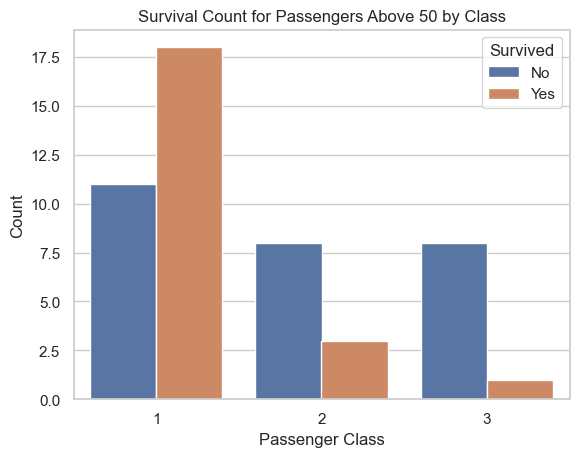

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'titanic' is your DataFrame
sns.set(style="whitegrid")

# Filter passengers above 50 years old
above_50 = titanic_train[titanic_train['Age'] > 50]

# Create the plot
ax = sns.countplot(x='Pclass', hue='Survived', data=above_50)

# Customize the plot
ax.set_title('Survival Count for Passengers Above 50 by Class')
ax.set_xlabel('Passenger Class')
ax.set_ylabel('Count')
ax.legend(title='Survived', loc='upper right', labels=['No', 'Yes'])

# Show the plot
plt.show()


C:\Users\asmit\AppData\Local\Temp\ipykernel_8168\3039200879.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(titanic_train['Age'].dropna(),kde=False,color='darkred',bins=30)


<Axes: xlabel='Age'>

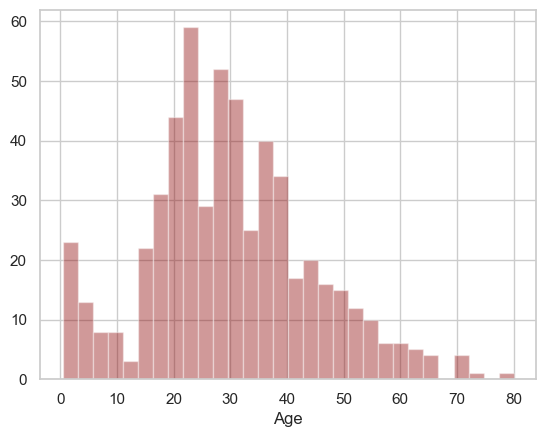

In [19]:
sns.distplot(titanic_train['Age'].dropna(),kde=False,color='darkred',bins=30)

<Axes: xlabel='SibSp', ylabel='count'>

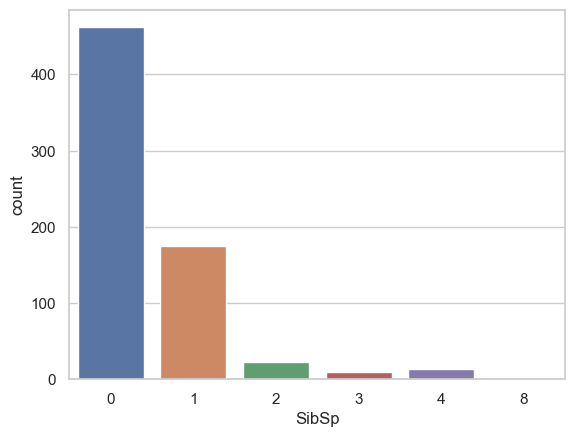

In [20]:
sns.countplot(x='SibSp',data=titanic_train)

C:\Users\asmit\AppData\Local\Temp\ipykernel_8168\3887689406.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=titanic_train.corr()#["Survived"]


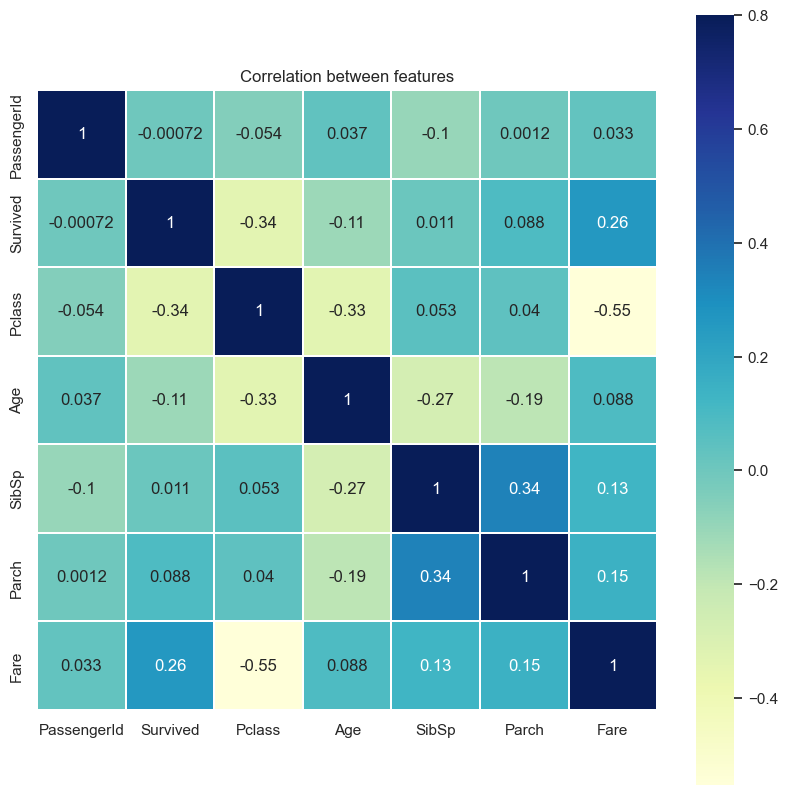

In [21]:
corr=titanic_train.corr()#["Survived"]
plt.figure(figsize=(10, 10))

sns.heatmap(corr, vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap='YlGnBu',linecolor="white")
plt.title('Correlation between features');

In [22]:
#correlation of features with target variable
titanic_train.corr()["Survived"]

C:\Users\asmit\AppData\Local\Temp\ipykernel_8168\1814583429.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  titanic_train.corr()["Survived"]


PassengerId   -0.000718
Survived       1.000000
Pclass        -0.341241
Age           -0.113426
SibSp          0.011496
Parch          0.088092
Fare           0.258859
Name: Survived, dtype: float64

In [23]:
#Lets check which rows have null Embarked column
titanic_train[titanic_train['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
183,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
368,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


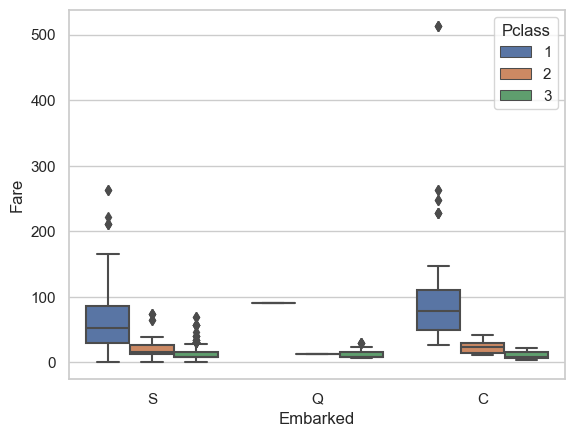

In [24]:
sns.boxplot(x="Embarked", y="Fare", hue="Pclass", data=titanic_train);

In [25]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [26]:
titanic_train['Age'] = titanic_train[['Age','Pclass']].apply(impute_age,axis=1)

In [27]:
titanic_train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          512
Embarked         2
dtype: int64

<Axes: >

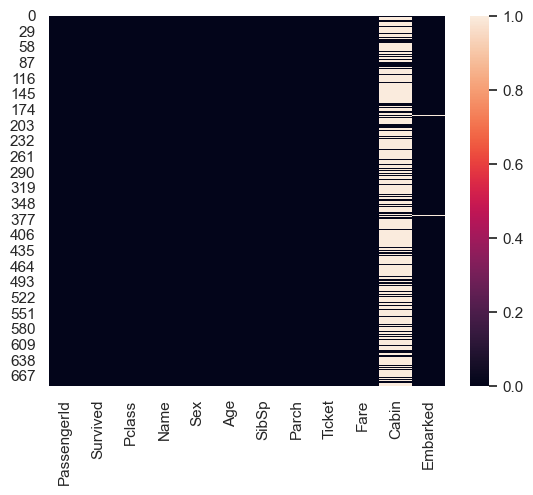

In [28]:
sns.heatmap(titanic_train.isnull())

In [29]:
titanic_train.drop('Cabin',axis=1,inplace=True)
titanic_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,395,1,3,"Sandstrom, Mrs. Hjalmar (Agnes Charlotta Bengt...",female,24.0,0,2,PP 9549,16.7000,S
1,675,0,2,"Watson, Mr. Ennis Hastings",male,29.0,0,0,239856,0.0000,S
2,403,0,3,"Jussila, Miss. Mari Aina",female,21.0,1,0,4137,9.8250,S
3,146,0,2,"Nicholls, Mr. Joseph Charles",male,19.0,1,1,C.A. 33112,36.7500,S
4,857,1,1,"Wick, Mrs. George Dennick (Mary Hitchcock)",female,45.0,1,1,36928,164.8667,S
...,...,...,...,...,...,...,...,...,...,...,...
679,817,0,3,"Heininen, Miss. Wendla Maria",female,23.0,0,0,STON/O2. 3101290,7.9250,S
680,215,0,3,"Kiernan, Mr. Philip",male,24.0,1,0,367229,7.7500,Q
681,668,0,3,"Rommetvedt, Mr. Knud Paust",male,24.0,0,0,312993,7.7750,S
682,269,1,1,"Graham, Mrs. William Thompson (Edith Junkins)",female,58.0,0,1,PC 17582,153.4625,S


        Survived
Sex             
female       233
male         109


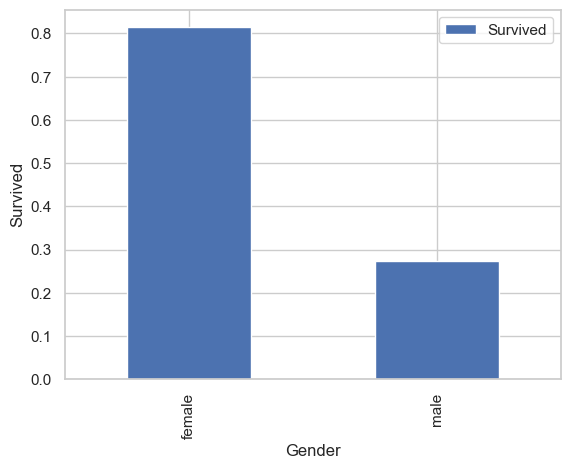

In [30]:
plt1 = titanic_train[["Sex","Survived"]].groupby("Sex").mean().plot(kind="bar",legend=True)
plt1
print(titanic_train[["Sex","Survived"]].groupby("Sex").sum())
plt1.set_xlabel("Gender")
plt1.set_ylabel("Survived")
plt.show()

In [31]:
titanic_train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,395,1,3,"Sandstrom, Mrs. Hjalmar (Agnes Charlotta Bengt...",female,24.0,0,2,PP 9549,16.7,S
1,675,0,2,"Watson, Mr. Ennis Hastings",male,29.0,0,0,239856,0.0,S


In [32]:
auto = ['PassengerId','Survived','Pclass','Name','Sex','Age','SibSp','Parch','Ticket','Fare','Embarked']
auto

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Embarked']

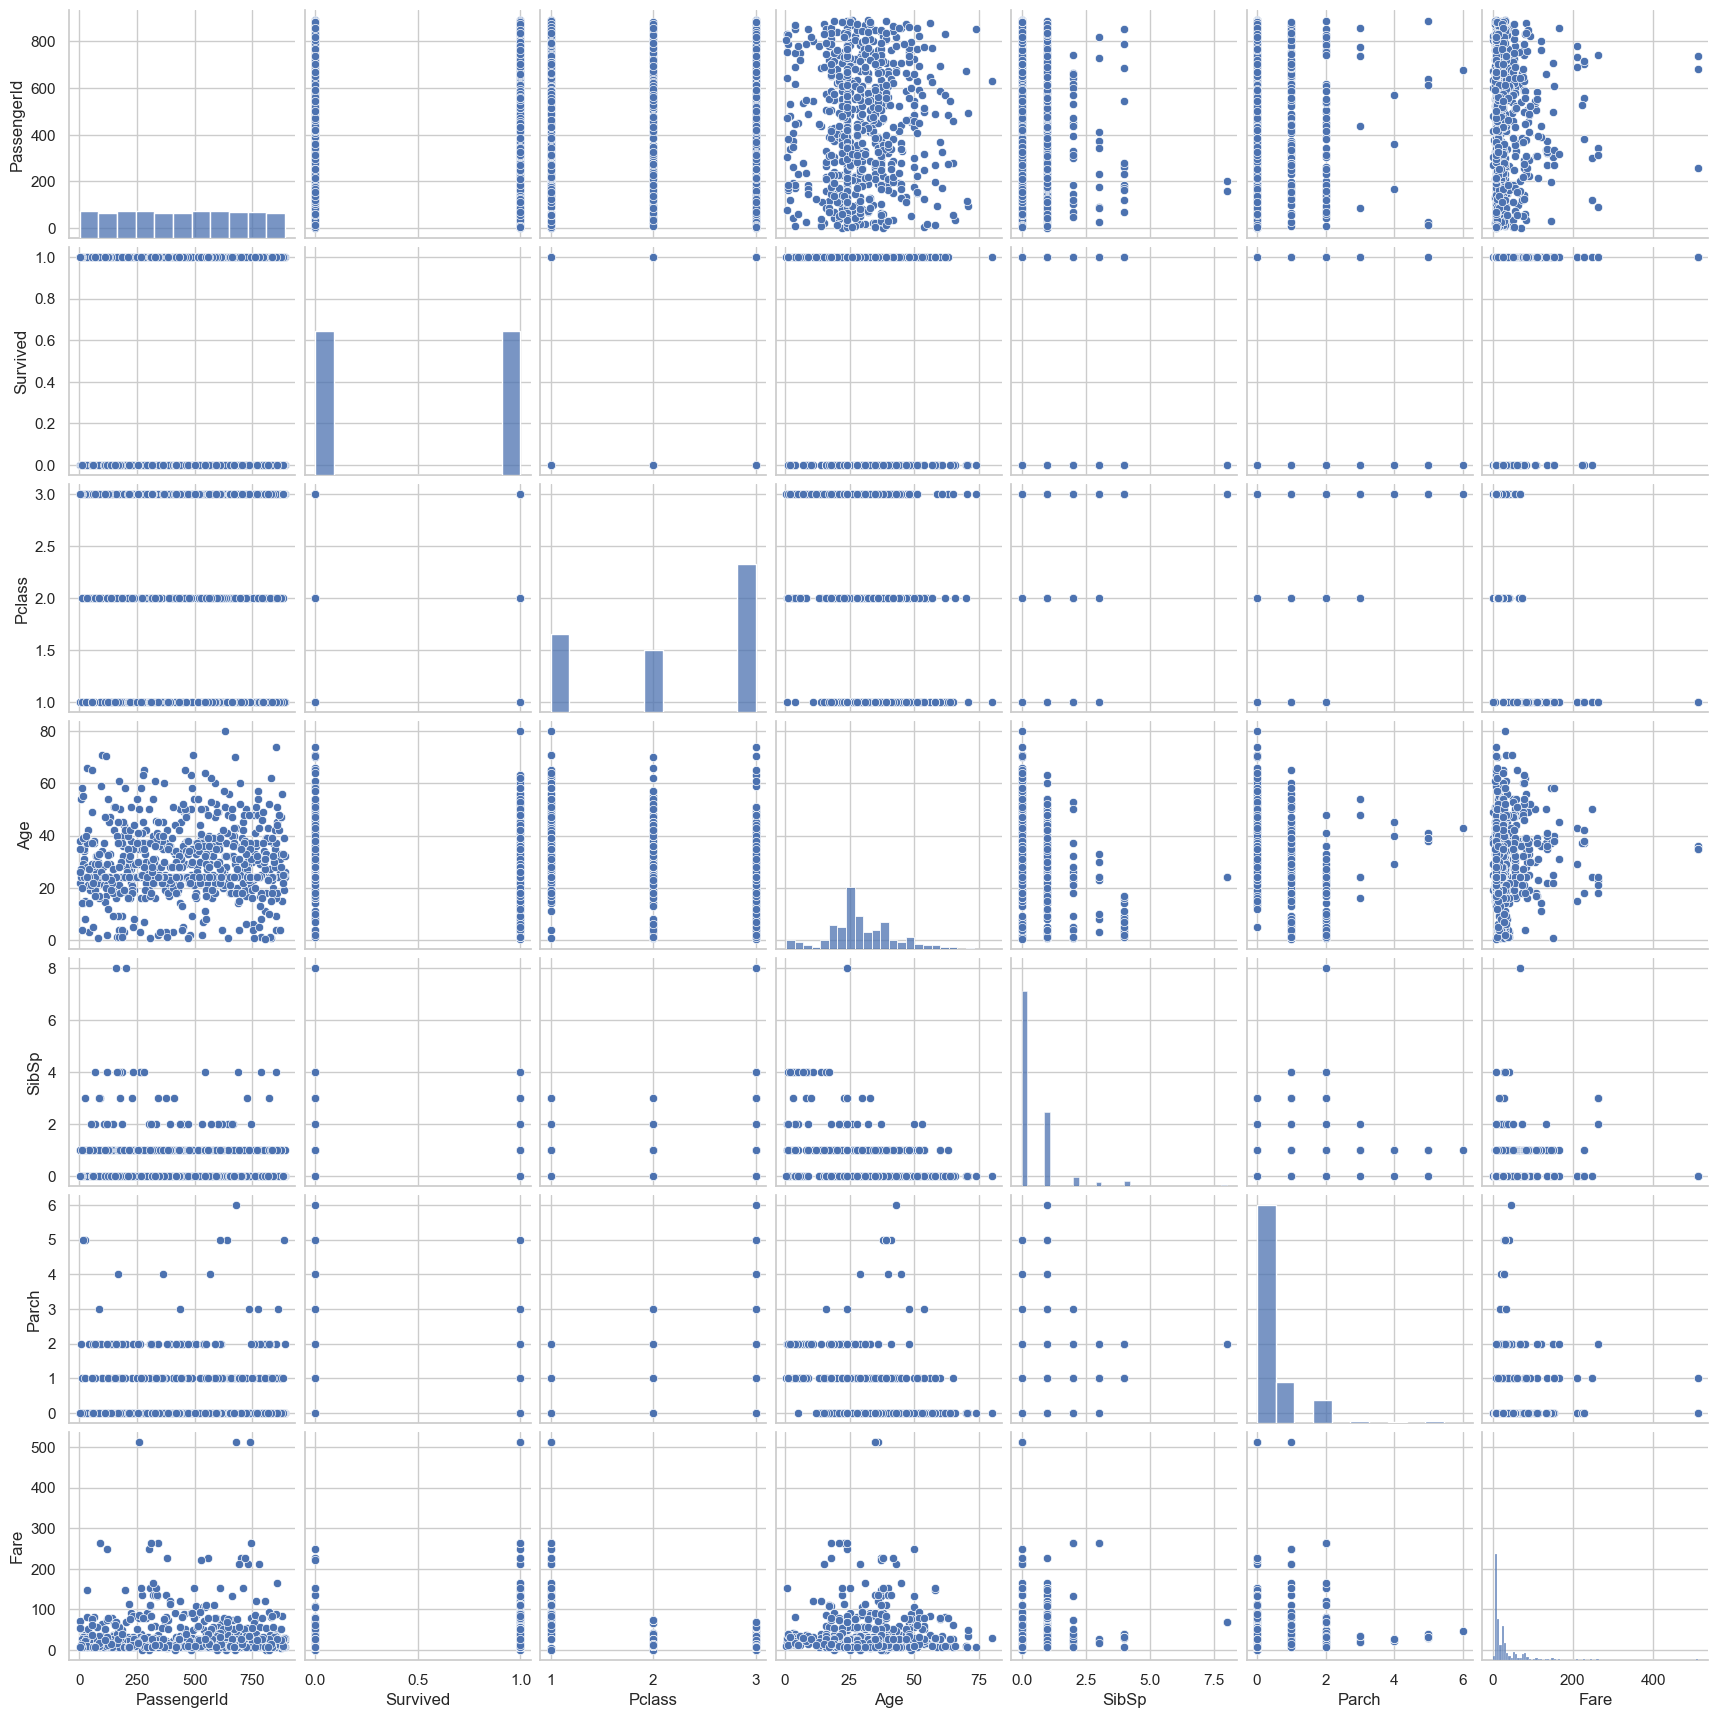

In [33]:
sns.pairplot(titanic_train)
plt.show()

In [34]:
sex = pd.get_dummies(titanic_train['Sex'],drop_first=True)
embark = pd.get_dummies(titanic_train['Embarked'],drop_first= True)

In [35]:
titanic_train.drop(['Sex','Embarked','Name'],axis=1,inplace=True)

In [36]:
titanic_train = pd.concat([titanic_train,sex,embark],axis=1)
titanic_train

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Ticket,Fare,male,Q,S
0,395,1,3,24.0,0,2,PP 9549,16.7000,0,0,1
1,675,0,2,29.0,0,0,239856,0.0000,1,0,1
2,403,0,3,21.0,1,0,4137,9.8250,0,0,1
3,146,0,2,19.0,1,1,C.A. 33112,36.7500,1,0,1
4,857,1,1,45.0,1,1,36928,164.8667,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
679,817,0,3,23.0,0,0,STON/O2. 3101290,7.9250,0,0,1
680,215,0,3,24.0,1,0,367229,7.7500,1,1,0
681,668,0,3,24.0,0,0,312993,7.7750,1,0,1
682,269,1,1,58.0,0,1,PC 17582,153.4625,0,0,1


In [37]:
titanic_train = titanic_train.drop('Ticket', axis=1)

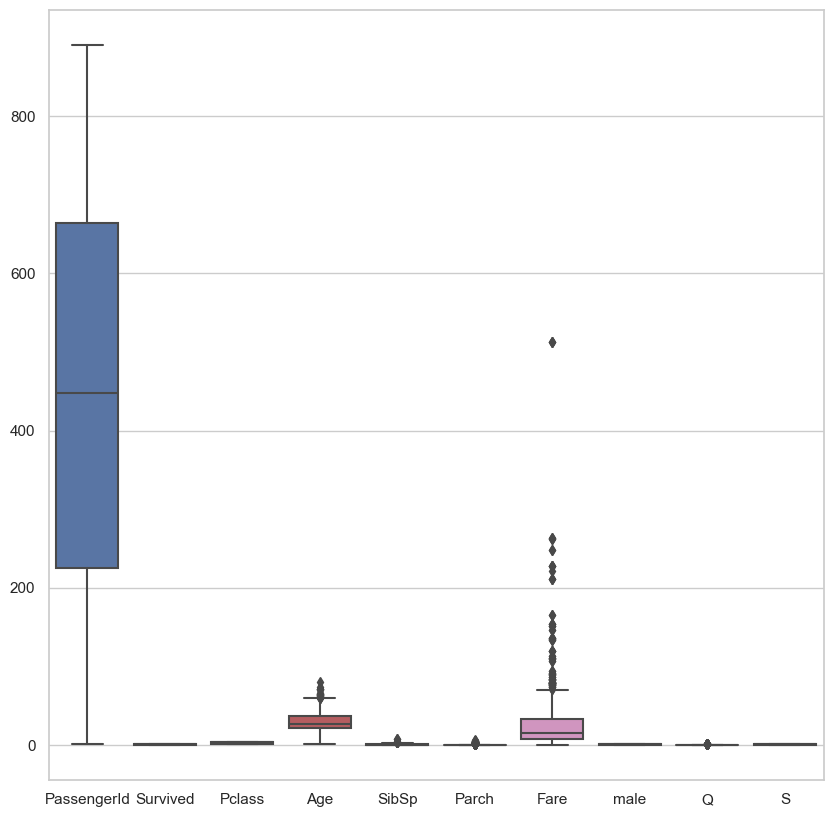

In [38]:
plt.figure(figsize=(10,10))

sns.boxplot(data=titanic_train)

# Show the plot
plt.show()

In [39]:
# Define the threshold for fare
fare_threshold = 400

# Filter rows where 'Fare' is not greater than the threshold
titanic_train= titanic_train[titanic_train['Fare'] <= fare_threshold]

# Display the shape before and after removing outliers
print(f"Shape before removing outliers: {titanic_train.shape}")
print(f"Shape after removing outliers: {titanic_train.shape}")


Shape before removing outliers: (681, 10)
Shape after removing outliers: (681, 10)


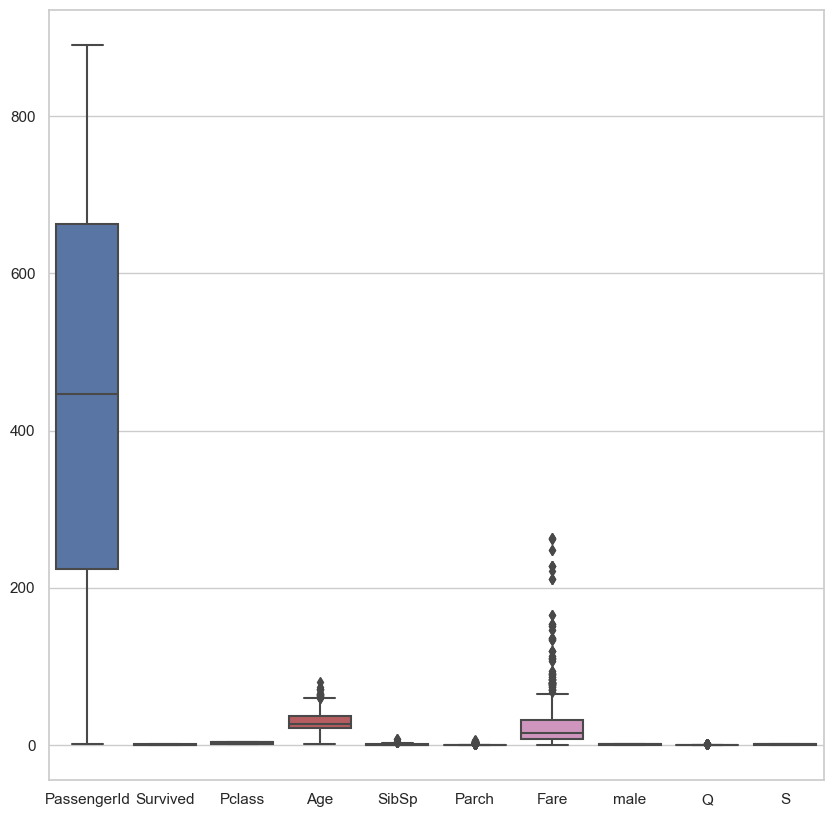

In [40]:
plt.figure(figsize=(10,10))

sns.boxplot(data=titanic_train)

# Show the plot
plt.show()

In [41]:
titanic_train

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,395,1,3,24.0,0,2,16.7000,0,0,1
1,675,0,2,29.0,0,0,0.0000,1,0,1
2,403,0,3,21.0,1,0,9.8250,0,0,1
3,146,0,2,19.0,1,1,36.7500,1,0,1
4,857,1,1,45.0,1,1,164.8667,0,0,1
...,...,...,...,...,...,...,...,...,...,...
679,817,0,3,23.0,0,0,7.9250,0,0,1
680,215,0,3,24.0,1,0,7.7500,1,1,0
681,668,0,3,24.0,0,0,7.7750,1,0,1
682,269,1,1,58.0,0,1,153.4625,0,0,1


In [42]:
from sklearn.model_selection import train_test_split

In [43]:
X = titanic_train.drop(columns = 'Survived', axis=1)
y = titanic_train['Survived']

In [44]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(544, 9) (137, 9) (544,) (137,)


In [45]:
X_train

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
201,798,3,31.0,0,0,8.6833,0,0,1
382,624,3,21.0,0,0,7.8542,1,0,1
238,458,1,37.0,1,0,51.8625,0,0,1
102,771,3,24.0,0,0,9.5000,1,0,1
670,69,3,17.0,4,2,7.9250,0,0,1
...,...,...,...,...,...,...,...,...,...
9,610,1,40.0,0,0,153.4625,0,0,1
361,799,3,30.0,0,0,7.2292,1,0,0
193,848,3,35.0,0,0,7.8958,1,0,0
632,571,2,62.0,0,0,10.5000,1,0,1


In [46]:
scaler=MinMaxScaler()
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Logistic Regression

In [47]:
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [48]:
X_pred = model.predict(X_train)
training_acc = accuracy_score(X_pred, y_train)
print("Accuracy on training data", training_acc)

Accuracy on training data 0.7683823529411765


In [49]:
y_pred = model.predict(X_test)
training_acc = accuracy_score(y_pred, y_test)
print("Accuracy on testing data", training_acc)

Accuracy on testing data 0.7737226277372263


In [79]:
#Classification report
len(model.predict(X_train))
print(classification_report(y_test,model.predict(X_test)))
print(confusion_matrix(y_test,model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.81      0.76      0.79        75
           1       0.73      0.79      0.76        62

    accuracy                           0.77       137
   macro avg       0.77      0.78      0.77       137
weighted avg       0.78      0.77      0.77       137

[[57 18]
 [13 49]]


Text(0.5, 1.0, 'Accuracy Score: 0.7737226277372263')

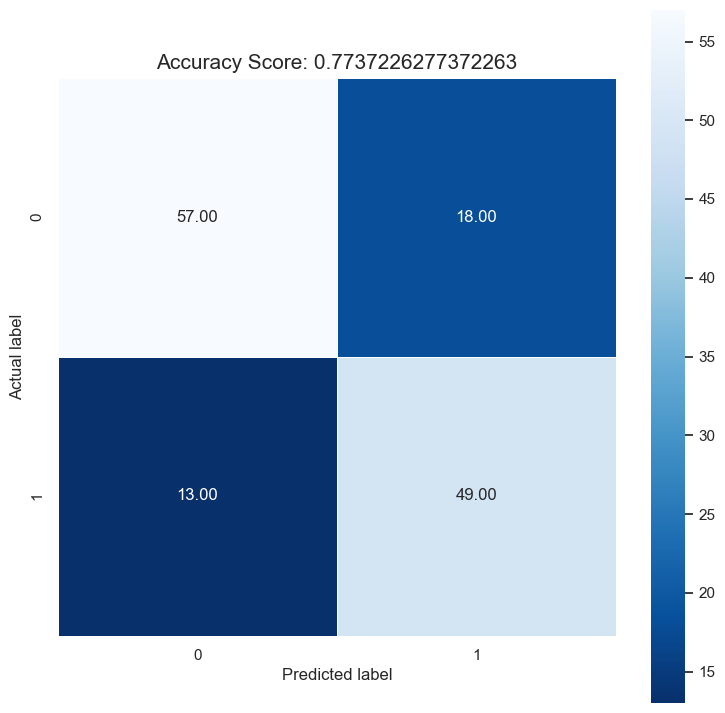

In [80]:
cm = confusion_matrix(y_test,model.predict(X_test))
plt.figure(figsize=(9,9))
sns.heatmap(cm,annot=True, fmt='.2f', linewidths=.7, square=True,cmap='Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(accuracy_score(y_test,model.predict(X_test)))
plt.title(all_sample_title,size=15)

In [50]:
titanic_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
count,681.000000,681.000000,681.000000,681.000000,681.000000,681.000000,681.00000,681.000000,681.000000,681.000000
mean,444.048458,0.497797,2.246696,29.332849,0.465492,0.392070,32.56491,0.581498,0.083700,0.704846
std,256.979300,0.500363,0.851085,13.404012,0.892319,0.831651,42.62953,0.493676,0.277142,0.456447
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,224.000000,0.000000,1.000000,22.000000,0.000000,0.000000,7.92500,0.000000,0.000000,0.000000
50%,447.000000,0.000000,3.000000,27.000000,0.000000,0.000000,15.50000,1.000000,0.000000,1.000000
75%,663.000000,1.000000,3.000000,37.000000,1.000000,0.000000,31.38750,1.000000,0.000000,1.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,263.00000,1.000000,1.000000,1.000000


In [51]:
titanic_train['Survived'].value_counts()

0    342
1    339
Name: Survived, dtype: int64

# RandomForest

In [68]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Create Random Forest model
rf_model = RandomForestClassifier()

 # Define parameter grid for grid search
param_distributions = {
    'n_estimators': [5,6,7,8,9, 10, 12, 14, 15],
    'max_depth': [None, 6,7, 8,9,10,11,12,13,14,15,16],
    'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10],
    'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9],
    'criterion': ['gini', 'entropy']
}

# Create a RandomizedSearchCV instance
random_search = RandomizedSearchCV(rf_model, param_distributions, n_iter=10, cv=5, n_jobs=-1, random_state=42)

# Fit the model to the data
random_search.fit(X_train, y_train)

# Get the best hyperparameter values
best_params = random_search.best_params_

In [69]:
best_params 

{'n_estimators': 10,
 'min_samples_split': 4,
 'min_samples_leaf': 6,
 'max_depth': 8,
 'criterion': 'entropy'}

In [70]:
rf_model = RandomForestClassifier(**best_params)
rf_model.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=8, min_samples_leaf=6,
                       min_samples_split=4, n_estimators=10)

In [71]:
X_pred = rf_model.predict(X_train)
training_acc = accuracy_score(X_pred, y_train)
print("Accuracy on training data", training_acc)

Accuracy on training data 0.8345588235294118


In [72]:
y_pred = rf_model.predict(X_test)
training_acc = accuracy_score(y_pred, y_test)
print("Accuracy on testing data", training_acc)

Accuracy on testing data 0.8102189781021898


In [83]:
#Classification report
len(rf_model.predict(X_train))
print(classification_report(y_test,model.predict(X_test)))
print(confusion_matrix(y_test,model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.81      0.76      0.79        75
           1       0.73      0.79      0.76        62

    accuracy                           0.77       137
   macro avg       0.77      0.78      0.77       137
weighted avg       0.78      0.77      0.77       137

[[57 18]
 [13 49]]


Text(0.5, 1.0, 'Accuracy Score: 0.8102189781021898')

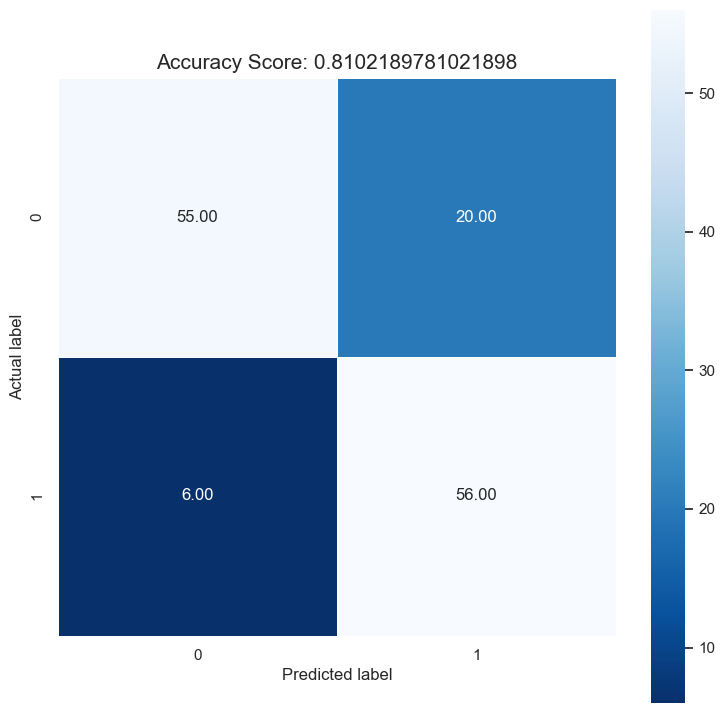

In [82]:
cm = confusion_matrix(y_test,rf_model.predict(X_test))
plt.figure(figsize=(9,9))
sns.heatmap(cm,annot=True, fmt='.2f', linewidths=.7, square=True,cmap='Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(accuracy_score(y_test,rf_model.predict(X_test)))
plt.title(all_sample_title,size=15)

In [74]:
# Features for the new passenger
new_passenger = pd.DataFrame({
    'PassengerId': [3],  # Replace with the actual PassengerId for the new passenger
    'Pclass': [3],
    'Age': [26.0],
    'SibSp': [0],
    'Parch': [0],
    'Fare': [7.9250],
    'Sex': [0],  # Male
    'Embarked_Q': [0],
    'Embarked_S': [1]
})

# Extract PassengerId for reference if needed
passenger_id = new_passenger['PassengerId'].values[0]

# Make prediction
prediction = rf_model.predict(new_passenger)

# Display the result
if prediction[0] == 1:
    print(f"Passenger with ID {passenger_id} is predicted to have survived.")
else:
    print(f"Passenger with ID {passenger_id} is predicted to not have survived.")


Passenger with ID 3 is predicted to have survived.


C:\Users\asmit\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [77]:
titanic_train[titanic_train["PassengerId"] ==3]

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
664,3,1,3,26.0,0,0,7.925,0,0,1


In [78]:
rf_model.feature_importances_

array([0.11862894, 0.11395958, 0.1118146 , 0.0153642 , 0.0201703 ,
       0.18832269, 0.39986452, 0.01185602, 0.02001916])